## Task3

Extracted reviews for the book Sapiens: A Brief History of Humankind  from good reads and performed sentiment analysis.


In [3]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

We will get the user reviews of book Sapiens: A Brief History of Humankind  from www.goodreads.com

In [4]:
# creating empty reviews list
book_reviews=[]
ip=[]
url ="https://www.goodreads.com/book/show/23692271-sapiens"
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.find_all("div", attrs={"class","reviewText stacked"})# Extracting the content under specific tags  
for i in range(len(reviews)):
        ip.append(reviews[i].text) 
book_reviews = ip


In [5]:
book_reviews

['\n\nSapiens: A Brief History of Humankind is a book bound to appear on a large number of coffee tables and favorite lists, and be picked up even by those who normally would not find the time for reading. It will certainly not be the next A Brief History of Time, which is often named as the world\'s top unfinished popular bestseller.Both A Brief History of Time and Sapiens share a similar, worthy goal - to explain complex issues in a way which can actually be understood and comprehended by most people\nSapiens: A Brief History of Humankind is a book bound to appear on a large number of coffee tables and favorite lists, and be picked up even by those who normally would not find the time for reading. It will certainly not be the next A Brief History of Time, which is often named as the world\'s top unfinished popular bestseller.Both A Brief History of Time and Sapiens share a similar, worthy goal - to explain complex issues in a way which can actually be understood and comprehended by m

In [6]:
# writng reviews in a text file 
with open("book.txt", "w", encoding='utf8') as output:
    output.write(str(book_reviews))

In [7]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(book_reviews)

In [8]:
ip_rev_string

'\n\nSapiens: A Brief History of Humankind is a book bound to appear on a large number of coffee tables and favorite lists, and be picked up even by those who normally would not find the time for reading. It will certainly not be the next A Brief History of Time, which is often named as the world\'s top unfinished popular bestseller.Both A Brief History of Time and Sapiens share a similar, worthy goal - to explain complex issues in a way which can actually be understood and comprehended by most people\nSapiens: A Brief History of Humankind is a book bound to appear on a large number of coffee tables and favorite lists, and be picked up even by those who normally would not find the time for reading. It will certainly not be the next A Brief History of Time, which is often named as the world\'s top unfinished popular bestseller.Both A Brief History of Time and Sapiens share a similar, worthy goal - to explain complex issues in a way which can actually be understood and comprehended by mo

In [9]:
import nltk
# from nltk.corpus import stopwords

# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+", " ", ip_rev_string).lower()
# ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

# words that contained in the reviews
ip_reviews_words = ip_rev_string.split(" ")

ip_reviews_words = ip_reviews_words[1:]



In [10]:
ip_rev_string

' sapiens a brief history of humankind is a book bound to appear on a large number of coffee tables and favorite lists and be picked up even by those who normally would not find the time for reading it will certainly not be the next a brief history of time which is often named as the world s top unfinished popular bestseller both a brief history of time and sapiens share a similar worthy goal to explain complex issues in a way which can actually be understood and comprehended by most people sapiens a brief history of humankind is a book bound to appear on a large number of coffee tables and favorite lists and be picked up even by those who normally would not find the time for reading it will certainly not be the next a brief history of time which is often named as the world s top unfinished popular bestseller both a brief history of time and sapiens share a similar worthy goal to explain complex issues in a way which can actually be understood and comprehended by most people just as a 

In [11]:
ip_reviews_words

['sapiens',
 'a',
 'brief',
 'history',
 'of',
 'humankind',
 'is',
 'a',
 'book',
 'bound',
 'to',
 'appear',
 'on',
 'a',
 'large',
 'number',
 'of',
 'coffee',
 'tables',
 'and',
 'favorite',
 'lists',
 'and',
 'be',
 'picked',
 'up',
 'even',
 'by',
 'those',
 'who',
 'normally',
 'would',
 'not',
 'find',
 'the',
 'time',
 'for',
 'reading',
 'it',
 'will',
 'certainly',
 'not',
 'be',
 'the',
 'next',
 'a',
 'brief',
 'history',
 'of',
 'time',
 'which',
 'is',
 'often',
 'named',
 'as',
 'the',
 'world',
 's',
 'top',
 'unfinished',
 'popular',
 'bestseller',
 'both',
 'a',
 'brief',
 'history',
 'of',
 'time',
 'and',
 'sapiens',
 'share',
 'a',
 'similar',
 'worthy',
 'goal',
 'to',
 'explain',
 'complex',
 'issues',
 'in',
 'a',
 'way',
 'which',
 'can',
 'actually',
 'be',
 'understood',
 'and',
 'comprehended',
 'by',
 'most',
 'people',
 'sapiens',
 'a',
 'brief',
 'history',
 'of',
 'humankind',
 'is',
 'a',
 'book',
 'bound',
 'to',
 'appear',
 'on',
 'a',
 'large',
 'nu

In [12]:
type(ip_reviews_words)

list

In [22]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True, ngram_range=(1, 1))
vectorizer=TfidfVectorizer(use_idf=True) 
X = vectorizer.fit_transform(ip_reviews_words)

with open("stop.txt", "r") as sw:
    stop_words = sw.read()
    
stop_words = stop_words.split("\n")

stop_words.extend(["sapiens",'book','author','harari','read','thing'])

ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]



In [23]:
ip_reviews_words

['history',
 'humankind',
 'bound',
 'large',
 'number',
 'coffee',
 'tables',
 'favorite',
 'lists',
 'picked',
 'find',
 'time',
 'reading',
 'history',
 'time',
 'named',
 'world',
 'top',
 'unfinished',
 'popular',
 'bestseller',
 'history',
 'time',
 'share',
 'similar',
 'worthy',
 'goal',
 'explain',
 'complex',
 'issues',
 'understood',
 'comprehended',
 'people',
 'history',
 'humankind',
 'bound',
 'large',
 'number',
 'coffee',
 'tables',
 'favorite',
 'lists',
 'picked',
 'find',
 'time',
 'reading',
 'history',
 'time',
 'named',
 'world',
 'top',
 'unfinished',
 'popular',
 'bestseller',
 'history',
 'time',
 'share',
 'similar',
 'worthy',
 'goal',
 'explain',
 'complex',
 'issues',
 'understood',
 'comprehended',
 'people',
 'history',
 'aimed',
 'explaining',
 'cosmology',
 'lay',
 'audience',
 'aims',
 'provide',
 'readable',
 'concise',
 'historical',
 'summary',
 'progress',
 'human',
 'evolution',
 'pages',
 'histories',
 'individual',
 'countries',
 'volumes',
 'h

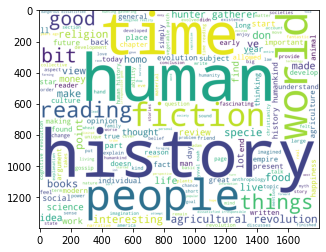

In [24]:
# Joining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

# WordCloud can be performed on the string inputs.
# Corpus level word cloud

wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)
plt.imshow(wordcloud_ip)



In [25]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")



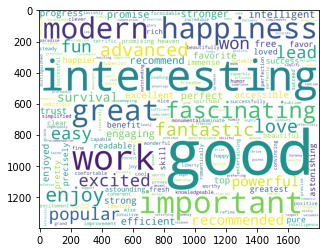

In [26]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)



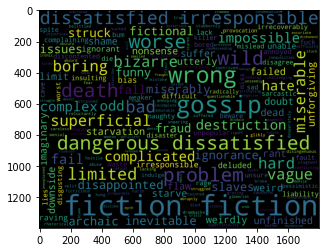

In [27]:
# negative words Choose path for -ve words stored in system
with open("negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)




In [28]:
# wordcloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

WNL = nltk.WordNetLemmatizer()

# Lowercase and tokenize
text = ip_rev_string.lower()

# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['harari','book'] # If you want to remove any particular word form text which does not contribute much in meaning

new_stopwords = stopwords_wc.union(customised_words)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aanand.ORADEV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
new_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'book',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'harari',
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',

In [30]:
# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]

# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

# nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
bigrams_list



[('history', 'humankind'),
 ('humankind', 'bound'),
 ('bound', 'large'),
 ('large', 'number'),
 ('number', 'coffee'),
 ('coffee', 'table'),
 ('table', 'favorite'),
 ('favorite', 'list'),
 ('list', 'picked'),
 ('picked', 'find'),
 ('find', 'time'),
 ('time', 'reading'),
 ('reading', 'history'),
 ('history', 'time'),
 ('time', 'named'),
 ('named', 'world'),
 ('world', 'top'),
 ('top', 'unfinished'),
 ('unfinished', 'popular'),
 ('popular', 'bestseller'),
 ('bestseller', 'history'),
 ('history', 'time'),
 ('time', 'share'),
 ('share', 'similar'),
 ('similar', 'worthy'),
 ('worthy', 'goal'),
 ('goal', 'explain'),
 ('explain', 'complex'),
 ('complex', 'issue'),
 ('issue', 'understood'),
 ('understood', 'comprehended'),
 ('comprehended', 'people'),
 ('people', 'history'),
 ('history', 'humankind'),
 ('humankind', 'bound'),
 ('bound', 'large'),
 ('large', 'number'),
 ('number', 'coffee'),
 ('coffee', 'table'),
 ('table', 'favorite'),
 ('favorite', 'list'),
 ('list', 'picked'),
 ('picked', 'fi

In [28]:
#nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aanand.ORADEV\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [31]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
dictionary2

['history humankind',
 'humankind bound',
 'bound large',
 'large number',
 'number coffee',
 'coffee table',
 'table favorite',
 'favorite list',
 'list picked',
 'picked find',
 'find time',
 'time reading',
 'reading history',
 'history time',
 'time named',
 'named world',
 'world top',
 'top unfinished',
 'unfinished popular',
 'popular bestseller',
 'bestseller history',
 'history time',
 'time share',
 'share similar',
 'similar worthy',
 'worthy goal',
 'goal explain',
 'explain complex',
 'complex issue',
 'issue understood',
 'understood comprehended',
 'comprehended people',
 'people history',
 'history humankind',
 'humankind bound',
 'bound large',
 'large number',
 'number coffee',
 'coffee table',
 'table favorite',
 'favorite list',
 'list picked',
 'picked find',
 'find time',
 'time reading',
 'reading history',
 'history time',
 'time named',
 'named world',
 'world top',
 'top unfinished',
 'unfinished popular',
 'popular bestseller',
 'bestseller history',
 'histor

In [32]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:100]



[('agricultural revolution', 28),
 ('hunter gatherer', 21),
 ('history humankind', 14),
 ('human history', 11),
 ('cognitive revolution', 10),
 ('vegetable patch', 9),
 ('time reading', 8),
 ('yuval noah', 8),
 ('imagined reality', 8),
 ('hunting gathering', 7),
 ('year ago', 7),
 ('dangerous dissatisfied', 7),
 ('dissatisfied irresponsible', 7),
 ('irresponsible god', 7),
 ('god don', 6),
 ('homo deus', 6),
 ('homo specie', 6),
 ('point view', 6),
 ('human specie', 5),
 ('human condition', 5),
 ('don wrong', 5),
 ('human being', 5),
 ('reading time', 5),
 ('human right', 5),
 ('imagined order', 5),
 ('humankind yuval', 5),
 ('history time', 4),
 ('human evolution', 4),
 ('revolution history', 4),
 ('stopped reading', 4),
 ('history world', 4),
 ('short history', 4),
 ('history human', 4),
 ('bad found', 4),
 ('specie homo', 4),
 ('raw egg', 4),
 ('make interesting', 4),
 ('tree knowledge', 4),
 ('knowledge mutation', 4),
 ('state market', 4),
 ('reading book', 4),
 ('focusing homo', 4

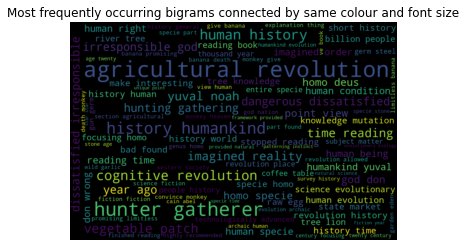

In [33]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)

wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
